In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("adult.data")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [12]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
df.drop(['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week'],axis=1,inplace=True)

In [14]:
df.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
for i in df:
    df[i] = le.fit_transform(df[i])

In [18]:
df.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0


In [19]:
gnb = GaussianNB()

In [23]:
X=df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
gnb.fit(X_train,y_train)

C:\Users\Sanjana Shankar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [27]:
pred = gnb.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,roc_curve

In [35]:
print(confusion_matrix(y_test,pred))

[[3783 1129]
 [ 541 1059]]


In [36]:
print(accuracy_score(y_test,pred))

0.7435503685503686


In [37]:
print(f1_score(y_test,pred))

0.5591341077085533


In [38]:
print(recall_score(y_test,pred))

0.661875


In [39]:
print(precision_score(y_test,pred))

0.4840036563071298


In [40]:
prob = gnb.predict_proba(X_test)[:,1]

In [44]:
fpr,tpr,threshold = roc_curve(y_test,pred)

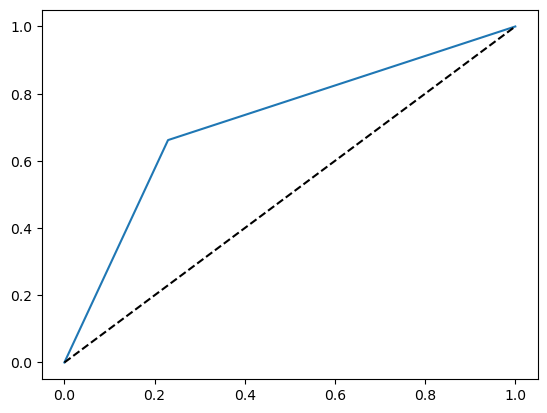

In [52]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')

In [48]:
prob = gnb.predict_proba(X_test)[:,1]

In [49]:
fpr1,tpr1,thresh1 = roc_curve(y_test,prob)

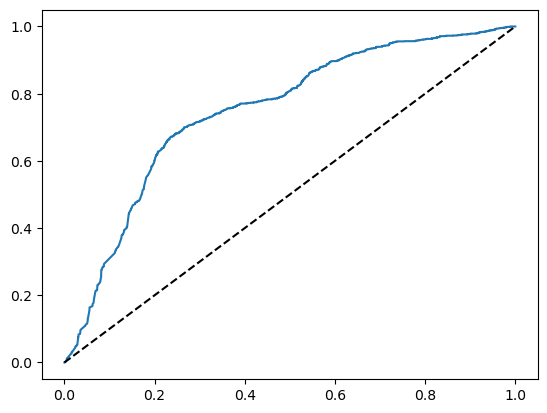

In [51]:
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'k--')

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      4912
           1       0.48      0.66      0.56      1600

    accuracy                           0.74      6512
   macro avg       0.68      0.72      0.69      6512
weighted avg       0.78      0.74      0.76      6512

